In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./db/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [5]:

df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Ivory Coast           1.0
Poland                1.0
Nigeria               1.0
Faroe Islands         1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [13]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.drop(['SNo'], axis = 1, inplace = True)

In [14]:
df_time = df.groupby(['Country/Region',
                     pd.Grouper(key='ObservationDate', freq = '1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [15]:

df_china = df_time.loc['Mainland China', :]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


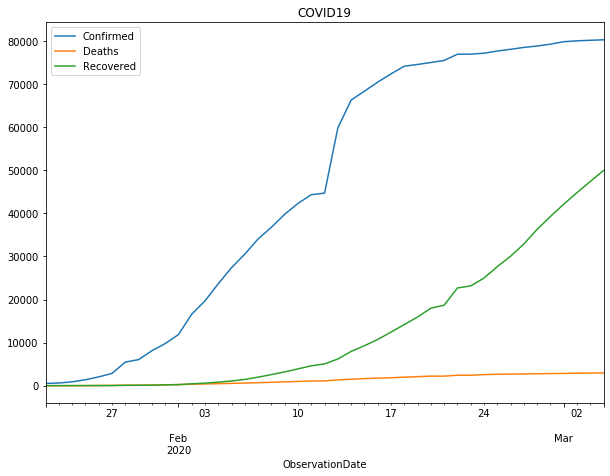

In [16]:
import matplotlib.pyplot as plt
df_china.plot(figsize = (10, 7), title = 'COVID19')

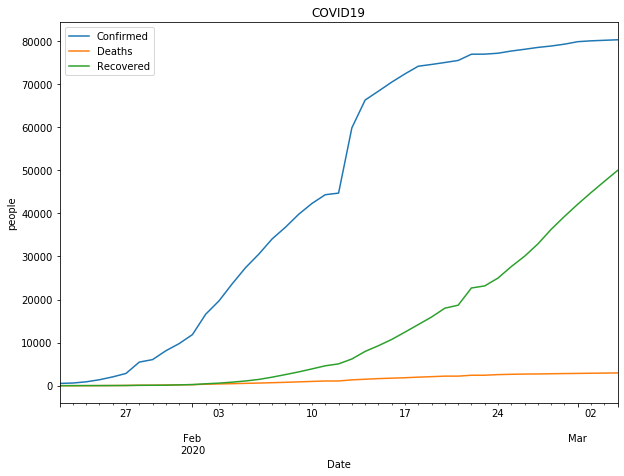

In [18]:
df_china.plot(figsize = (10, 7), title = 'COVID19')
plt.xlabel('Date')
plt.ylabel('people')
plt.show()

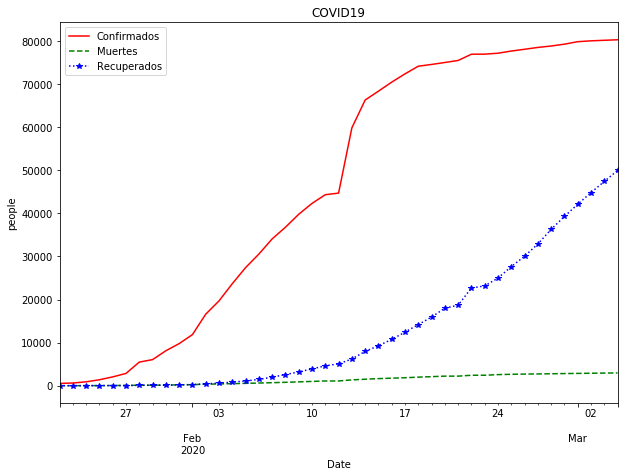

In [21]:
ax = df_china.plot(figsize = (10, 7), title = 'COVID19', legend= False, style = ['r-', 'g--', 'b:*'] )

ax.legend(['Confirmados', 'Muertes', 'Recuperados'])
plt.xlabel('Date')
plt.ylabel('people')
plt.show()

In [23]:
df_monthy = df_china.resample('M').max()
df_monthy

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


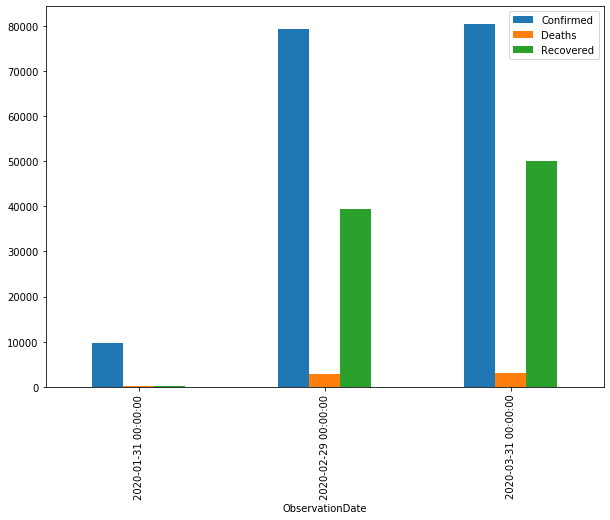

In [24]:
df_monthy.plot(kind = 'bar', figsize = (10, 7))

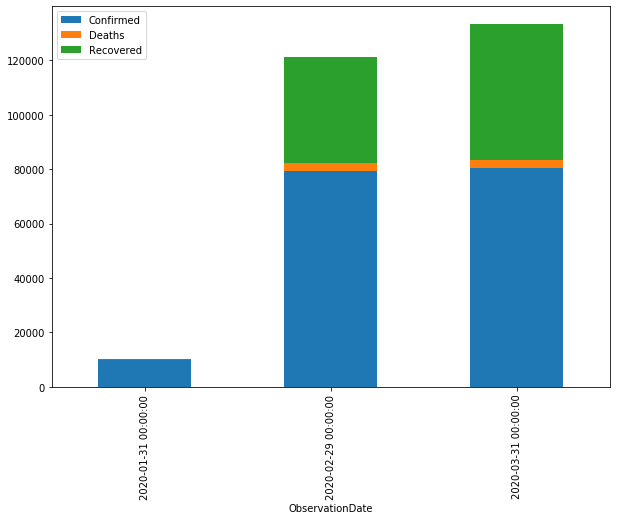

In [25]:
df_monthy.plot(kind = 'bar', figsize = (10, 7), stacked = True)

In [28]:
df_monthy['Traitment'] = df_monthy['Confirmed'] - df_monthy['Deaths'] - df_monthy['Recovered']
df_monthy

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4B49D9148>,
      dtype=object)

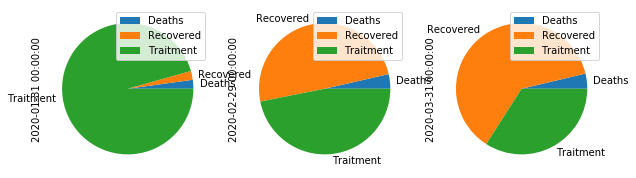

In [29]:
df_monthy[['Deaths', 'Recovered',  'Traitment']].T.plot(kind = 'pie', figsize = (10, 7), subplots = True)

In [31]:
df_china['rate'] = 1 - df_china['Deaths'] / df_china['Recovered']
df_china

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22,547.0,17.0,28.0,0.392857
2020-01-23,639.0,18.0,30.0,0.400000
2020-01-24,916.0,26.0,36.0,0.277778
2020-01-25,1399.0,42.0,39.0,-0.076923
2020-01-26,2062.0,56.0,49.0,-0.142857
2020-01-27,2863.0,82.0,58.0,-0.413793
2020-01-28,5494.0,131.0,101.0,-0.297030
2020-01-29,6070.0,133.0,120.0,-0.108333
2020-01-30,8124.0,171.0,135.0,-0.266667


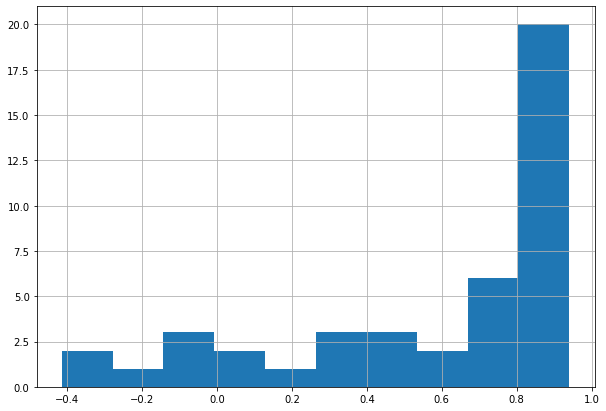

In [32]:
df_china['rate'].hist(figsize = (10, 7), bins= 10)

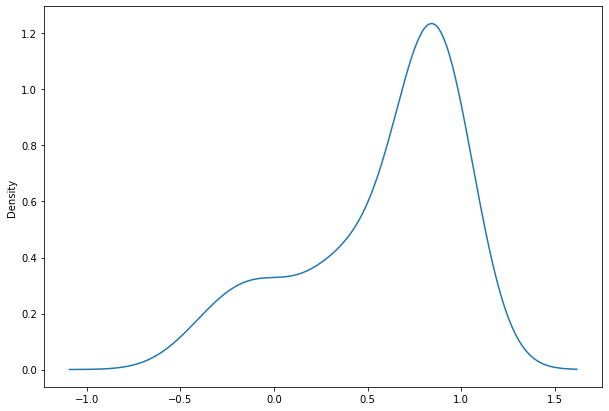

In [36]:
df_china['rate'].plot(figsize = (10, 7), kind = 'kde')